<a href="https://colab.research.google.com/github/egeoguzman/reinforcement_qLearning_mazeSolving/blob/master/reinforcement_qLearning_mazeSolving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REINFORCEMENT Q-LEARNING SHORTEST PATH ALGORITHM

You can use colab.research.google.com to run this program

https://github.com/egeoguzman/reinforcement_qLearning_mazeSolving


In [0]:
#Project Requirements

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [0]:
# Map Informations 
map_information={"walls" : [(4,3),(2,3),(0,5),(2,7),(5,2),(3,6),(4,1),(3,0),(5,6)] ,"information" : {"rows":8,"columns":8, "start":(2,1), "end":(0,3)	}}

#Points of Obstacles 
obstacle = map_information["walls"]
#Initial point of the agent and the target point 
start = map_information["information"]["start"]
end = map_information["information"]["end"]

#Size of the map
map_height = map_information["information"]["rows"]
map_width = map_information["information"]["columns"]

In [0]:
# Default matrix to observation (REWARD-TABLE)

R = np.zeros((map_height,map_width))


#Inserts obstacles , start and end points to the R martix
for x,y in enumerate(obstacle):
  R[y[0]][y[1]]= -1

R[start[0]][start[1]]= 100
R[end[0]][end[1]]= 100

# '0s' are free cells. '-1s' are the obstacles.'5' is the 5TART point.'3' is the 3ND Point.

print(R)

[[  0.   0.   0. 100.   0.  -1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 100.   0.  -1.   0.   0.   0.  -1.]
 [ -1.   0.   0.   0.   0.   0.  -1.   0.]
 [  0.  -1.   0.  -1.   0.   0.   0.   0.]
 [  0.   0.  -1.   0.   0.   0.  -1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


In [0]:
# Defines the free points that agent can move on. Last edge is the END POINT and before the last is the START POINT.
free_points = []
free_cells = []
for x in range(map_height):
  for y in range(map_width):
    if R[x][y] == 0:
      free_points.append((x,y))
free_points.append(start)
free_points.append(end)
print(free_points)

[(0, 0), (0, 1), (0, 2), (0, 4), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 2), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 7), (4, 0), (4, 2), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 3), (5, 4), (5, 5), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (2, 1), (0, 3)]


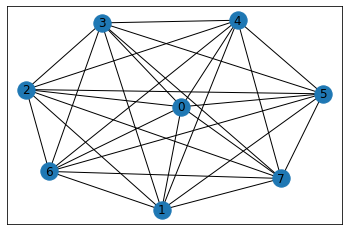

In [0]:
import networkx as nx
# 3ND point is the or goal that stored in the last element of our free point list.

G=nx.Graph()
G.add_edges_from(free_points)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

# The network seems like as below.This connections are round-trip.
#Start point = 2 and end point is 7 as you can see in the points list.

In [0]:
# Defines Q - TABLE
Q = np.zeros((map_height,map_width))
#Learning parameter
gamma = 0.8
initial_state = 2
goal = 3



In [0]:
#Function lists the all possible paths
def available_actions(state):
  current_state_row = R[state,]
  available_act = np.where(current_state_row >= 0)[0]
  return available_act

available_act = available_actions(initial_state)
print(available_act)

#You can check the list with the network graph above

[0 1 2 4 5 6]


In [0]:
#Select the next path randomly.
def next_action(available_act):
  next_action = int(np.random.choice(available_act,1))
  return next_action
action = next_action(available_act)
print(action)


4


#Q-LEARNING FORMULA:                          

**Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]**

In [0]:
# This function updates the Q matrix according to the path selected and the Q learning algorithm
# The brain of our project. It updates the Q Matrix to see shortest path for agent.
def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[0]


    if max_index.shape[0] > 1:
        max_index = np.random.choice(max_index, size = 1)
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

    # Update Q matrix
update(initial_state,action,gamma)


In [0]:
#Training
# Train over 100 iterations. (Re-iterate the process above).
for i in range(100):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = next_action(available_act)
    update(current_state,action,gamma)
    
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

#<-------------------------------------------------------------------->#

# Testing
current_state = initial_state
last_state = goal

steps = [current_state]

while current_state != last_state:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[0]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)

Trained Q matrix:
[[ 52.91005291  27.08994709  42.32804233 100.          33.86243386
    0.          33.86243386  42.32804233]
 [ 52.91005291  27.08994709  42.32804233  33.86243386   0.
    0.          33.86243386  42.32804233]
 [ 52.91005291   0.          42.32804233   0.           0.
    0.           0.           0.        ]
 [  0.           0.          42.32804233  33.86243386  33.86243386
    0.           0.          42.32804233]
 [  0.           0.          42.32804233   0.          33.86243386
   27.08994709   0.          42.32804233]
 [ 52.91005291   0.           0.          33.86243386  33.86243386
   27.08994709   0.           0.        ]
 [ 52.91005291   0.          42.32804233   0.          33.86243386
    0.           0.           0.        ]
 [ 52.91005291  27.08994709  42.32804233   0.          33.86243386
   27.08994709  42.32804233  42.32804233]]
Selected path:
[2, 0, 3]
